# 1. data understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sn
import seaborn as sns
%matplotlib inline

In [2]:
hr_data=pd.read_excel('F:\\pyWork\\pyProjects\\py_jupyter\\Finalprojects_DS-master\\HR_Analytics\\HR_Processed_data.xlsx')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_data.shape

(14999, 10)

In [5]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2.data cleaning and preparation

In [7]:
#changing names
hr_data=hr_data.rename(columns={'average_montly_hours':'average_monthly_hours'})
hr_data.columns=hr_data.columns.str.lower()
#removing duplicates
hr_data.loc[hr_data.duplicated()]#checking duplicate values
hr_data.drop_duplicates(keep=False,inplace=True)#deleting duplicates

hr_data.columns
hr_data.isnull().any()#no null values

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

# 3.data visualization

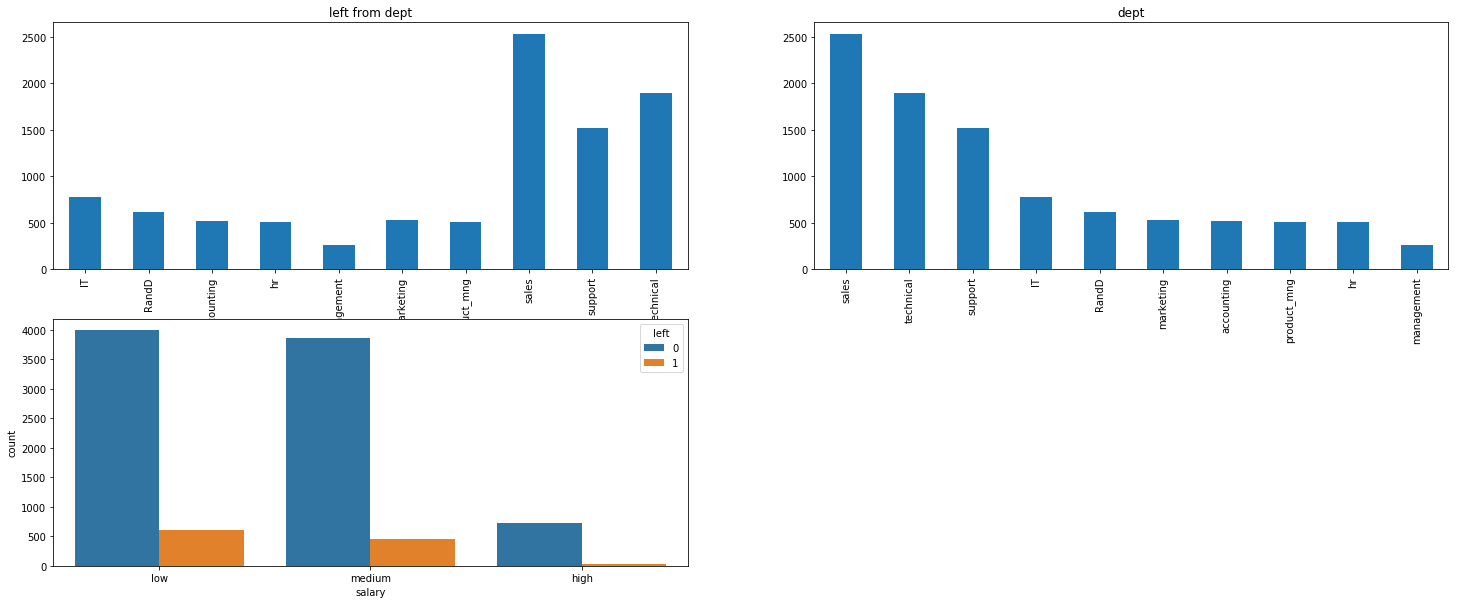

In [8]:
#department and salary relations with the left
plt.figure(figsize=(25,10))
plt.subplot(221)
hr_data.groupby(['department'])['left'].count().plot('bar',title='left from dept') #checking how many from each department left and didn't leave
plt.subplot(222)
hr_data['department'].value_counts().plot('bar',title='dept')#people in each department
plt.subplot(223)
sns.countplot(x='salary',hue='left',data=hr_data)#salary of people leaving and not leaving

Text(0.5, 1.0, 'employee turnover for work accidents')

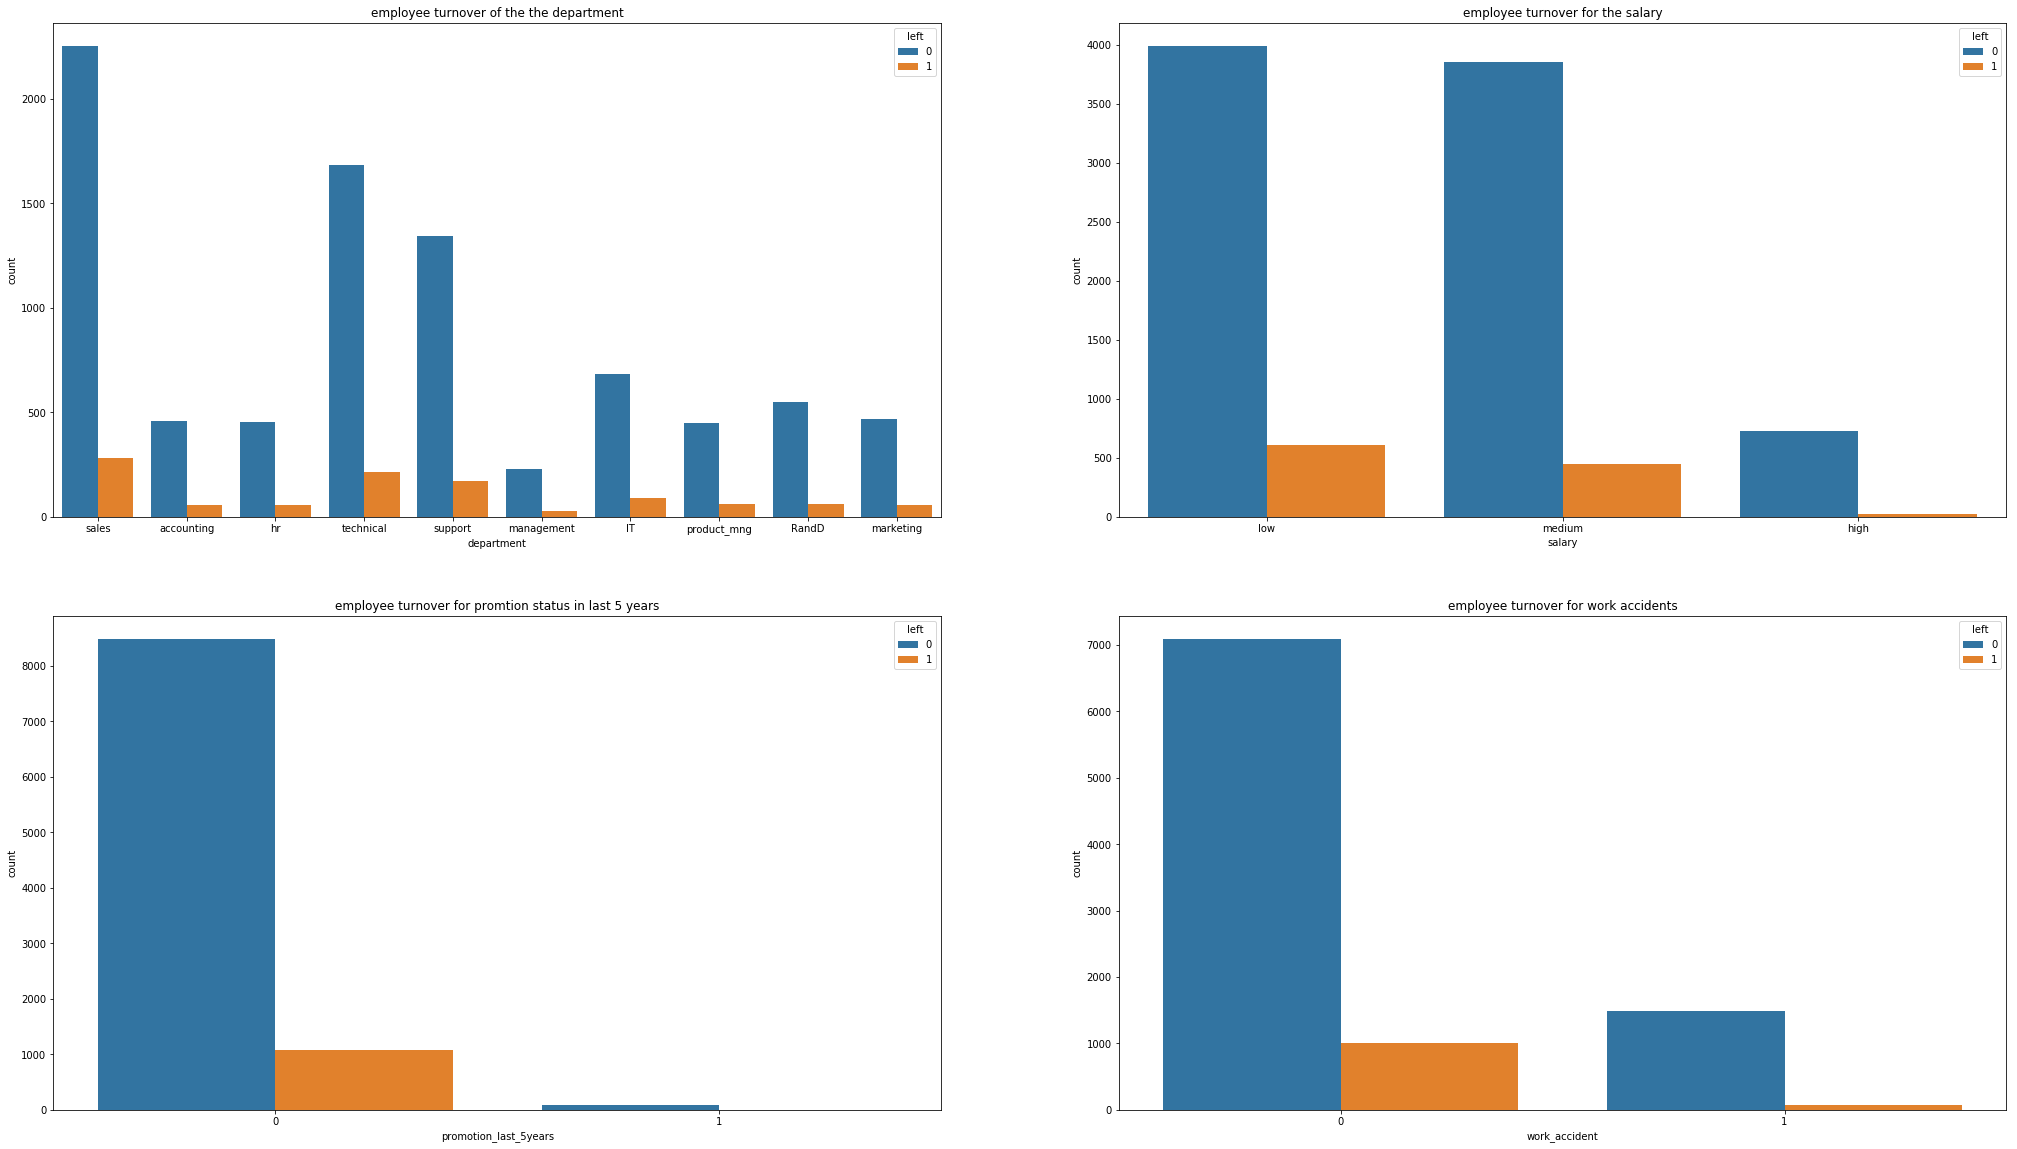

In [9]:
#turnovers dependency on various variables
#employee turnover of the the department
plt.figure(figsize=(35,20))
plt.subplot(221)
sns.countplot(x='department',hue='left',data=hr_data).set_title('employee turnover of the the department')
plt.subplot(222)
#employee turnover for the salary
sns.countplot(x='salary',hue='left',data=hr_data).set_title('employee turnover for the salary')
#employee turnover for promtion status in last 5 years
plt.subplot(223)
sns.countplot(x='promotion_last_5years',hue='left',data=hr_data).set_title('employee turnover for promtion status in last 5 years')
#employee turnover for work accidents
plt.subplot(224)
sns.countplot(x='work_accident',hue='left',data=hr_data).set_title('employee turnover for work accidents')

Text(0, 0.5, 'freq')

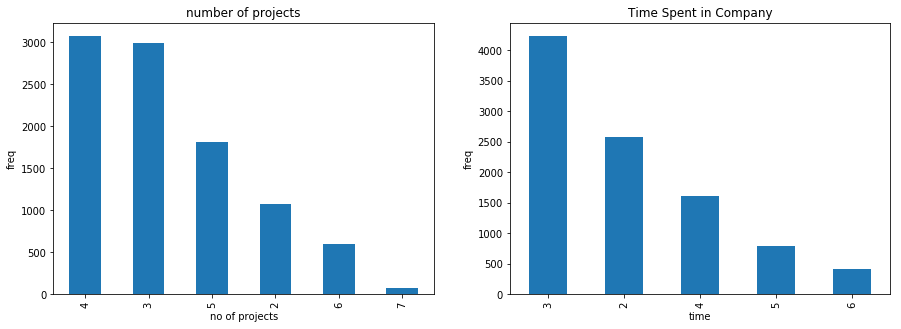

In [10]:
#number of projects
plt.figure(figsize=(15,5))
plt.subplot(121)
hr_data['number_project'].value_counts().plot('bar',title='number of projects')
plt.xlabel('no of projects')
plt.ylabel('freq')
#Time Spent in Company
plt.subplot(122)
hr_data['time_spend_company'].value_counts().plot('bar',title='Time Spent in Company')
plt.xlabel('time')
plt.ylabel('freq')

In [11]:
#correlation with left(target variable) for numeric data
cor=hr_data.corr().round(3).loc['left']
cor=pd.DataFrame(cor)
cor
result=[]
for i in cor['left']:
        if (i>-1 and i<-0.4): result.append('strong negative')
        elif (i>-0.4 and i<-0.2): result.append('moderate negative')
        elif (i>-0.2 and i<0): result.append('weak negative')
        elif(i>0 and i<0.2): result.append('weak positive')
        elif(i>0.2 and i<0.5): result.append('moderate positive')
        else : result.append('strong positive')
    
cor['correlation']=result

In [12]:
cor

,left,correlation
satisfaction_level,-0.305,moderate negative
last_evaluation,0.023,weak positive
number_project,0.041,weak positive
average_monthly_hours,0.071,weak positive
time_spend_company,0.235,moderate positive
work_accident,-0.094,weak negative
left,1.000,strong positive
promotion_last_5years,-0.028,weak negative


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [14]:
hr_data['department_code']=le.fit_transform(hr_data['department'])


In [15]:
hr_data.drop(['department'],axis=1,inplace=True)


In [16]:
hr_data['salary_code']=le.fit_transform(hr_data['salary'])

In [17]:
hr_data.drop(['salary'],axis=1,inplace=True)

In [18]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_code,salary_code
783,0.36,0.46,2,132,3,0,1,0,7,1
784,0.44,0.57,2,131,3,0,1,0,7,1
785,0.85,0.99,5,248,5,0,1,0,7,1
786,0.78,0.93,5,225,5,0,1,0,7,1
787,0.39,0.46,2,156,3,0,1,0,7,1


# 4.model building

In [19]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_code', 'salary_code'],
      dtype='object')

In [20]:
x=hr_data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_code', 'salary_code']]

In [21]:
y=hr_data['left']

In [22]:
stat=sn.OLS(y,x).fit()
print(stat.summary())

                            OLS Regression Results                            
Dep. Variable:                   left   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     321.1
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:37:01   Log-Likelihood:                -1865.0
No. Observations:                9653   AIC:                             3748.
Df Residuals:                    9644   BIC:                             3813.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -0.33

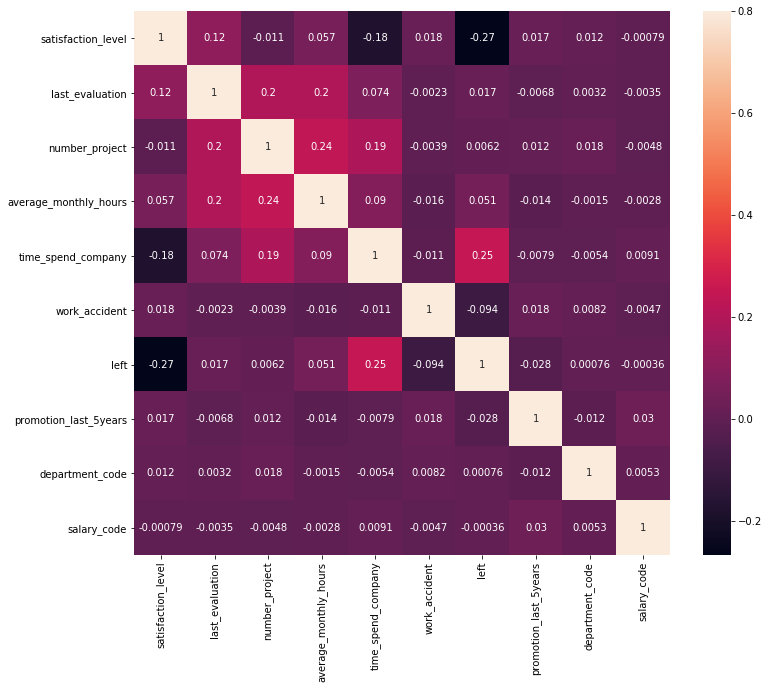

In [23]:
corrmat=hr_data.corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corrmat,vmax=.8,annot=True)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
lr = LogisticRegression(random_state=0)

In [27]:
lr.fit(x,y)

C:\Users\dell\Anaconda3b\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred=lr.predict(x_test)

In [29]:
lr.score(x,y).round(2)

0.87

# applying random forest for better accuracy

In [30]:
from sklearn.ensemble import RandomForestClassifier
raf=RandomForestClassifier(max_depth=9,random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=105,criterion='gini')
raf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=105, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
raf.score(x,y).round(2)

0.96

In [32]:
predicted_left=pd.DataFrame(raf.predict(x))
hr_data['predicted_left']=predicted_left
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_code,salary_code,predicted_left
783,0.36,0.46,2,132,3,0,1,0,7,1,1.0
784,0.44,0.57,2,131,3,0,1,0,7,1,1.0
785,0.85,0.99,5,248,5,0,1,0,7,1,1.0
786,0.78,0.93,5,225,5,0,1,0,7,1,0.0
787,0.39,0.46,2,156,3,0,1,0,7,1,0.0


In [44]:
compar=pd.DataFrame(hr_data[['left','predicted_left']])
compar

,left,predicted_left
783,1,1.0
784,1,1.0
785,1,1.0
786,1,0.0
787,1,0.0
788,1,1.0
789,1,1.0
790,1,0.0
791,1,0.0
792,1,0.0


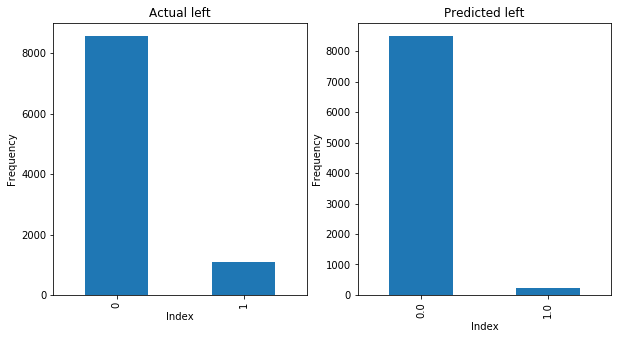

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Actual left')
plt.xlabel('Index')
plt.ylabel('Frequency')
compar['left'].value_counts().plot('bar')
plt.subplot(1,2,2)
plt.title('Predicted left')
plt.xlabel('Index')
plt.ylabel('Frequency')
compar['predicted_left'].value_counts().plot('bar')
